# O que é Estatística
Podemos considerar a Estatística como a área do conhecimento responsável por sistematizar as regras e técnicas utilizadas para organizar, descrever, analisar e interpretar dados.

## Estatística Descritiva
Foco em descrever e resumir dados.


## 1.2 População e amostra
População: Conjunto de elementos que queremos estudar determinada característica.
<br><br>
Exemplo 01: Numa determinada escola deseja-se investigar quais alunos do 3º ano do ensino médio irão fazer vestibular em 2024. Neste caso, a população de interesse consiste em todos os alunos matriculados no 3º ano dessa escola.
<br><br>
Amostra: Qualquer subconjunto de uma população.
<br><br>
Vamos considerar que nossa população é finita e tem tamanho N.
<br><br>
A técnica de amostragem mais utilizada é a amostragem aleatória simples, às vezes denominada simplesmente como AAS. Neste tipo de seleção cada elemento da população recebe um número de 1 até N. Após isso, para coletar uma amostra de tamanho n, sorteia-se um elemento da população com ou sem reposição.
<br><br>
Vamos selecionar uma amostra simples com python utilizando o método <b>.sample()<b>

In [22]:
from pathlib import Path
import os.path as path

import pandas as pd

DIRETORIO_ATUAL = Path.cwd()  # Diretório onde o notebook está
ENDERECO_ARQUIVO = path.join(DIRETORIO_ATUAL, 'dados', 'clientes.xlsx')

df = pd.read_excel(ENDERECO_ARQUIVO)
df.head(3)

,Cliente,Idade
0,João,30
1,Jéssica,18
2,Pedro,28


Amostra aleatória simples de 5 elementos sem reposição 

In [21]:
df.sample(5)

,Cliente,Idade
4,Maria,38
6,Marcelo,23
3,Carlos,42
2,Pedro,28
1,Jéssica,18


Amostra aleatória simples de 5 elementos com reposição

In [29]:
df2 = pd.read_csv(r'C:\Users\Flp\Documents\Análise de Dados\Estatística\dados\insurance.csv')
df2.head
df2.sample(n = 5, replace = True)

,age,sex,bmi,children,smoker,region,charges
682,39,male,35.300,2,yes,southwest,40103.89000
508,24,female,25.270,0,no,northeast,3044.21330
1176,52,female,24.130,1,yes,northwest,23887.66270
975,29,male,22.895,0,yes,northeast,16138.76205
361,35,male,30.500,1,no,southwest,4751.07000


## Variáveis Qualitativas x Quantitativas

### Qualitativas
Cada característica de uma população de interesse é denominada variável. Por exemplo, se nossa população forem os estudantes de uma escola, podemos definir algumas variáveis tais como: idade, turma, distância em km da casa do aluno até a escola, etc.
<br><br>
Se uma variável diz respeito a uma qualidade (atributo), denominamos-a de variável qualitativa. Se os possíveis valores puderem ser "ordenados de forma natural", classificamos como qualitativa ordinal, caso não, será denominada qualitativa nominal.
<br><br>
Vejamos alguns exemplos para facilitar o entendimento das definições:
<br><br>
Qualitativa Nominal: sexo (F ou M), fumante (sim ou não);
<br><br>
Qualitativa Ordinal: classe social (baixa, média, alta), tamanho (pequeno, médio, grande), escolaridade (1º, 2º ou 3º grau).

### Quantitativas
Já as variáveis quantitativas representam dados numéricos, geralmente provenientes de alguma contagem ou medição. Se o conjunto de valores possíveis da variável for enumerável, dizemos que a variável é discreta, caso contrário, será chamada de variável quantitativa contínua.
<br><br>
Na prática, os instrumentos de medição limitam a quantidade de casas decimais de uma variável contínua. Como assim? Não conseguimos medir um comprimento com "pi" metros, por exemplo.
<br><br>
E mais, algumas vezes, variáveis discretas são tratadas como contínuas a fim de facilitar a análise gráfica ou resumo dos dados numa tabela. Veremos um exemplo disso mais adiante.
<br><br>
Exemplos:
<br><br>
Quantitativa Discreta: idade, número de filhos, quantidade de pessoas que fazem compras num site por dia.
<br><br>
Quantitativa Contínua: temperatura, salário, peso e altura.

# Tabelas e Gráficos

## Tabelas de Frequência
Vamos começar resumindo dados qualitativos utilizando tabelas.
<br>
(a)Variáveis Qualitativas

In [31]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Agora, nossa ideia é contar a quantidade de beneficiários por sexo e colocar numa tabela a fim de resumir os dados da variável "sex".

In [44]:
df2['sex'].value_counts().reset_index(name = 'Frequência Absoluta')

,sex,Frequência Absoluta
0,male,676
1,female,662


Melhorando a formatação da tabela para uma melhor visualização.

In [43]:
formatado = df2['sex'].value_counts().reset_index(name = 'Frequência Absoluta').set_index('sex')
formatado.index.name = None
formatado.columns.name = 'Sexo'
formatado

Sexo,Frequência Absoluta
male,676
female,662


<b>Frequência Absoluta (fa)</b>: Quantidade de vezes que cada valor distinto aparece.
<br>
<b>Frequência Relativa (fr)</b>: Percentual de vezes que cada fa aparece em relação ao total da amostra n.

Além da frequência absoluta, podemos resumir nossos dados utilizando a frequência relativa. Para encontrar a frequência relativa da categoria "masculino".
<br>
Fórmula da fr: fa/n x 100 
<br>
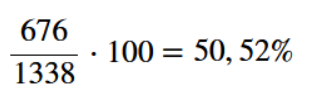

Proporção de beneficiários por sexo

In [51]:
#Criando DataFrame
tabela_fr = pd.DataFrame({'Frequência Absoluta': df2['sex'].value_counts(),
                         'Frequência Relativa (%)': df2['sex'].value_counts(1).round(4)*100})
#Formatando 
tabela_fr = tabela_fr.set_axis(['Masculino', 'Feminino'], axis = 'index').rename_axis('Sexo', axis = 'columns')

#Visualizando
tabela_fr

Sexo,Frequência Absoluta,Frequência Relativa (%)
Masculino,676,50.52
Feminino,662,49.48


Proporção de fumantes

In [60]:
fumantes_fr = pd.DataFrame({'Frequência Absoluta': df2['smoker'].value_counts(),
                           'Frequência Relativa (%)': df2['smoker'].value_counts(1).round(4)*100})
fumantes_fr = fumantes_fr.set_axis(['Não', 'Sim'], axis = 'index')
fumantes_fr

,Frequência Absoluta,Frequência Relativa (%)
Não,1064,79.52
Sim,274,20.48


(b) Variáveis Quantitativas Discretas.
<br><br>
Para resumir os dados da variável 'Children' podemos seguir a mesma ideia para resumir uma variável qualitativa.

In [69]:
df2['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [70]:
df2['children'].value_counts(1)

children
0    0.428999
1    0.242152
2    0.179372
3    0.117339
4    0.018685
5    0.013453
Name: proportion, dtype: float64

De acordo com a tabela acima, temos que 42% dos beneficiários não tem dependentes registrados e, aproximadamente apenas 1,35% tem 05 dependentes. E mais, não há nenhum beneficiário com mais de 05 dependentes.

Fórmula de Sturges: K = 1 + 3,322 * log10(n).
<br>
A fórmula de Sturges é utilizada para determinar a quantidade de classes que serão utilizadas para construir um histograma. Em que n representa a quantidade de elementos utilizadas na amostragem.
<br>
Antes de prosseguir, iremos visualizar a quantidade de registros na coluna "age" e também as idades mínima e máxima:

In [78]:
print(f'O total de dados na coluna "age": {df2["age"].count()}')
print(f'Valor máximo da coluna "age": {df2["age"].max()}')
print(f'Valor mínimo da coluna "age": {df2["age"].min()}')

O total de dados na coluna "age": 1338
Valor máximo da coluna "age": 64
Valor mínimo da coluna "age": 18


Considerando a Fórmula de Sturges para 1338 dados e, arredondando o valor de K (11,39) para o inteiro mais próximo, temos que o total de classes recomendado é igual à 11.

Como "64 - 18 = 46" e "46/11 = 4,18", vamos optar por considerar dez classes de tamanho 05 para evitar números não inteiros nas extremidades das classes.

SyntaxError: invalid syntax (3273569687.py, line 1)